In [1]:
# Import all libraries

import pandas as pd
import numpy as np

import plotly.offline as off
import plotly.express as px

In [2]:
# Specify data file and load both dataframes from it
datafile = '/data/RocklandSample/derivatives/noise.h5'
df_graphs = pd.read_hdf(datafile, 'graphs')
df_meta = pd.read_hdf(datafile, 'metadata')

In [22]:
fro = lambda x1, x2: np.linalg.norm(x1-x2, ord='fro')
pw = lambda xlist, func: [func(x1, x2) 
                          for idx, x1 in enumerate(xlist)
                          for x2 in xlist[idx:]]

In [30]:
graphs = df_graphs.query("noise_id != noise_id").graph.values

In [31]:
graphs.shape, graphs[0].shape

((1060,), (83, 83))

In [36]:
dists = []
for idx, g1 in enumerate(graphs):
    for g2 in graphs[idx:]:
        try:
            dists += [fro(g1, g2)]
        except ValueError as e:
#             print(e)
            continue

In [38]:
len(dists)/ graphs.shape[0]**2

0.4976477394090424

In [40]:
dists

[0.0,
 2799.2595449511286,
 3056.295306412651,
 4216.773885329874,
 3771.809247562766,
 3622.272905235054,
 3821.5280975023593,
 3121.7358952992804,
 4118.9791210929925,
 4409.245967282842,
 2981.436566489383,
 3592.158404079642,
 2637.419193074927,
 2944.731057329345,
 4087.846988330165,
 3032.0057717623163,
 2591.292341670465,
 3047.6193988095038,
 5282.665141763199,
 2855.115234101769,
 8294.411371519982,
 3543.9167597447886,
 4146.739080289475,
 3573.3373756196042,
 3802.324157669885,
 2908.4860322855257,
 3192.419771897173,
 3611.975221398951,
 3391.1409584386197,
 3058.1162502429497,
 4261.317519265608,
 3866.6382039182304,
 2945.944330770695,
 4058.441819220771,
 3170.7626842764503,
 3091.5378050413683,
 4153.4955158276025,
 3373.988144614619,
 3356.2993013138744,
 4535.124033584969,
 3084.7195982779376,
 3128.5386364882884,
 3454.8350177685766,
 2823.7027109807436,
 3882.1436088841433,
 3568.72974600207,
 2986.0743460269036,
 2820.362742627267,
 3735.5169655617947,
 2769.004694

In [39]:
distarray = np.array(dists)
np.mean(distarray)

4385.948083123481

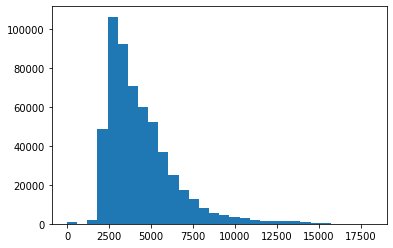

In [45]:
import matplotlib.pyplot as plt

plot = plt.hist(distarray, bins=30)
plt.show()

In [9]:
import nibabel as nib

In [15]:
im = nib.load('/data/RocklandSample/derivatives/sub-A00054358/ses-DS2/dwi/sub-A00054358_ses-DS2_dwi_eddy.nii.gz')
im.shape

(106, 90, 64, 137)

In [ ]:
v = 


In [17]:
v, 1/v

(610560, 1.6378406708595387e-06)

In [8]:
np.max(df_graphs.iloc[-1].graph), fro(df_graphs.iloc[-1].graph)

(8065.0, 8975.951927233122)

In [54]:
tmp_df_meta = df_meta.copy()
tmp_df_meta.sort_values(by='intensity', inplace=True)
# tmp_df_meta = df_meta.copy().loc[df_meta['noise_type'] == 'single']
# tmp_df_meta['intensity'] = [str(tval) for tval in tmp_df_meta.intensity]
fig = px.violin(tmp_df_meta, y="fro", x="noise_type", color="intensity",
                hover_data=["subses", "noise_id"], box=False, points="all")
print(fig.layout)
# fig.layout.xaxis['type'] = 'log'
# fig.layout.yaxis['type'] = 'log'
off.iplot(fig)

Layout({
    'height': 600,
    'legend': {'tracegroupgap': 0},
    'margin': {'t': 60},
    'template': '...',
    'violinmode': 'group',
    'xaxis': {'anchor': 'y', 'domain': [0.0, 0.98], 'title': {'text': 'noise_type'}},
    'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'fro'}}
})


In [ ]:
# A00040657_ses-DS2  ; 6e4dc3ca  (100)
# sub-A00066314_ses-CLGA   ; 5fd4bf30  (350)

In [101]:
g1 = df_graphs.query("noise_id == '5fd4bf30'").graph.values[0]
ref = df_graphs.query("subses == 'sub-A00066314_ses-CLGA'").query('noise_id != noise_id').graph.values[0]

In [102]:
df_graphs.query("noise_id == '6e4dc3ca'")

,graph,filename,subses,sub,ses,noise_id
6539,"[[185.0, 7.0, 0.0, 0.0, 0.0, 0.0, 17.0, 0.0, 0...",sub-A00040567_ses-DS2_dwi_eddy_1vox-6e4dc3ca_g...,sub-A00040567_ses-DS2,A00040567,DS2,6e4dc3ca


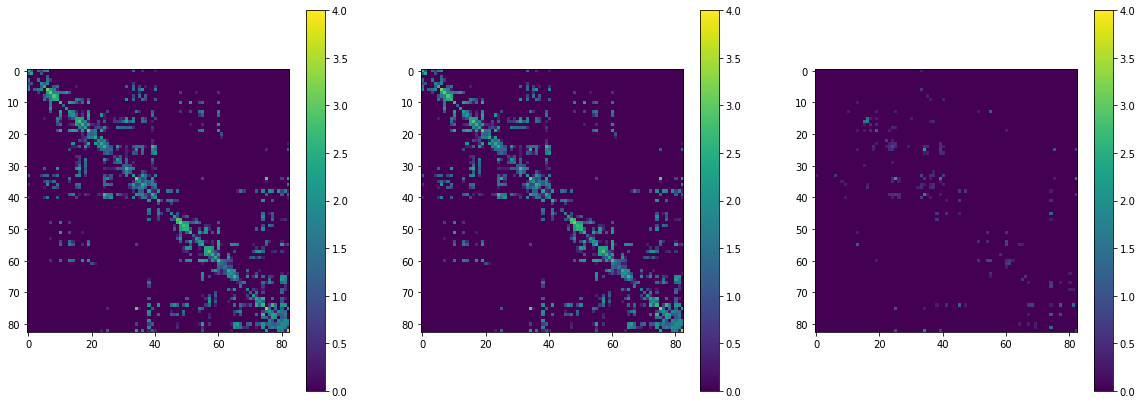

In [103]:
fig = plt.figure(figsize=(20, 7))
plt.subplot(131)
plt.imshow(np.log10(g1+1))
plt.colorbar()
plt.clim([0, 4])
plt.subplot(132)
plt.imshow(np.log10(ref+1))
plt.colorbar()
plt.clim([0, 4])
plt.subplot(133)
plt.imshow(np.log10(np.abs(g1-ref)+1))
plt.colorbar()
plt.clim([0, 4])
plt.show()

In [113]:
# len(np.where(np.abs(g1-ref))[0]) / (83*82/2)
fro(g1, ref) / fro(ref, np.zeros_like(ref))

0.05125310614633543

In [71]:
g1 = df_graphs.query("noise_id == '6e4dc3ca'").graph.values[0]
ref = df_graphs.query("subses == 'sub-A00040567_ses-DS2'").query('noise_id != noise_id').graph.values[0]

In [72]:
df_graphs.query("noise_id == '6e4dc3ca'")

,graph,filename,subses,sub,ses,noise_id
6539,"[[185.0, 7.0, 0.0, 0.0, 0.0, 0.0, 17.0, 0.0, 0...",sub-A00040567_ses-DS2_dwi_eddy_1vox-6e4dc3ca_g...,sub-A00040567_ses-DS2,A00040567,DS2,6e4dc3ca


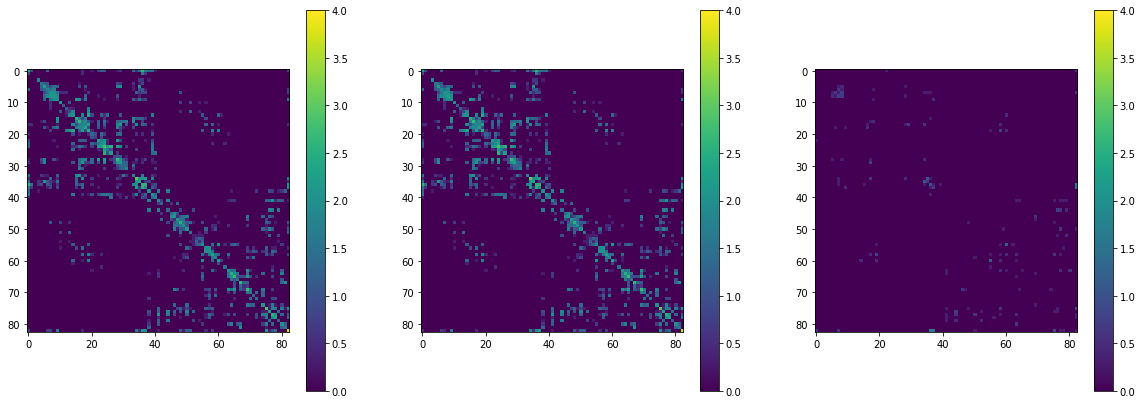

In [93]:
fig = plt.figure(figsize=(20, 7))
plt.subplot(131)
plt.imshow(np.log10(g1+1))
plt.colorbar()
plt.clim([0, 4])
plt.subplot(132)
plt.imshow(np.log10(ref+1))
plt.colorbar()
plt.clim([0, 4])
plt.subplot(133)
plt.imshow(np.log10(np.abs(g1-ref)+1))
plt.colorbar()
plt.clim([0, 4])
plt.show()

In [100]:
len(np.where(np.abs(g1-ref))[0]) / (83*82/2)

0.04319717895974141

In [15]:
# h/t: https://stackoverflow.com/a/35268906
cols = ['scale', 'noise_type', 'intensity']
noise_settings = df_meta.groupby(cols).size().reset_index().rename(columns={0:'count'})

In [16]:
# for g, val in df_meta.groupby(cols):
#     if g[1] == 'independent':
        

[((True, 'independent', 0.01), 2352),
 ((True, 'independent', 0.02), 981),
 ((True, 'independent', 0.05), 1462),
 ((True, 'independent', 0.1), 927),
 ((True, 'independent', 0.2), 1361),
 ((True, 'independent', 0.5), 1158),
 ((True, 'independent', 1.0), 1250),
 ((True, 'independent', 2.0), 1198),
 ((True, 'single', 0.01), 729),
 ((True, 'single', 0.02), 789),
 ((True, 'single', 0.05), 829),
 ((True, 'single', 0.1), 818),
 ((True, 'single', 0.2), 815),
 ((True, 'single', 0.5), 844),
 ((True, 'single', 1.0), 833),
 ((True, 'single', 2.0), 836)]

In [9]:
for _, ns in noise_settings.iterrows():
    print(ns[cols].values)

[True 0.01 'independent']
[True 0.01 'single']
[True 0.02 'independent']
[True 0.02 'single']
[True 0.05 'independent']
[True 0.05 'single']
[True 0.1 'independent']
[True 0.1 'single']
[True 0.2 'independent']
[True 0.2 'single']
[True 0.5 'independent']
[True 0.5 'single']
[True 1.0 'independent']
[True 1.0 'single']
[True 2.0 'independent']
[True 2.0 'single']


In [4]:
count_dict = df_meta.subses.value_counts().to_dict()
subses = list(count_dict.keys())

In [5]:
df_meta.loc[:, 'mse'] = None
df_meta.loc[:, 'fro'] = None
verb = False

for ss in subses:
    if verb:
        print("Subject-Session: {0}  ".format(ss), end='\t')
        print("Number of simulations: {0}".format(count_dict[ss]))

    qstring = 'subses == "{0}"'.format(ss)
    df_graphs_ss = df_graphs.query(qstring)
    ref = df_graphs_ss.loc[df_graphs_ss.noise_id.isnull()].iloc[0].graph
    
    for idx, graph in df_graphs_ss.iterrows():
        idx = df_meta.loc[df_meta.noise_id == graph.noise_id].index
        df_meta.loc[idx, 'mse'] = mse(ref, graph.graph)
        df_meta.loc[idx, 'fro'] = fro(ref, graph.graph)

In [6]:
df_meta

,base_image,intensity,matrix_hash,mm_location,scale,voxel_location,noise_type,filename,subses,sub,ses,noise_id,mse,fro
0,/project/6008063/gkiar/data/RocklandSample/der...,0.01,4b9d0a7d79ae13f24d0a068ac4038f6b858d8295,"[[-36.0, 25.69488525390625, 63.092010498046875...",True,"[[71, 46, 46, 0], [43, 55, 41, 1], [71, 67, 33...",independent,sub-A00027167_ses-CLG4R_dwi_eddy_1vox-168f0b0a...,sub-A00027167_ses-CLG4R,A00027167,CLG4R,168f0b0a,0.00870954,7.74597
1,/project/6008063/gkiar/data/RocklandSample/der...,0.05,49c34dfc18bbbee1b70c656c5ef1cd8c375f31a3,"[[16.0, -8.30511474609375, 7.092010498046875],...",True,"[[45, 29, 18, 0], [48, 53, 30, 1], [36, 61, 29...",independent,sub-A00027167_ses-CLG4R_dwi_eddy_1vox-16d92820...,sub-A00027167_ses-CLG4R,A00027167,CLG4R,16d92820,0.0056612,6.245
2,/project/6008063/gkiar/data/RocklandSample/der...,0.02,9dee024a8c7b6a2462a60b0ed186644babd85c01,"[[34.0, -38.30511474609375, 9.092010498046875]...",True,"[[36, 14, 19, 0], [42, 33, 43, 1], [36, 70, 30...",independent,sub-A00027167_ses-CLG4R_dwi_eddy_1vox-16fcf3a4...,sub-A00027167_ses-CLG4R,A00027167,CLG4R,16fcf3a4,0.000145159,1
3,/project/6008063/gkiar/data/RocklandSample/der...,0.01,9e28761fa3941ba14f7ec7cbbefe6ae138a36e79,"[[-20.0, 31.69488525390625, 43.092010498046875...",True,"[[63, 49, 36, 0], [69, 73, 34, 1], [67, 29, 44...",independent,sub-A00027167_ses-CLG4R_dwi_eddy_1vox-1a07f40e...,sub-A00027167_ses-CLG4R,A00027167,CLG4R,1a07f40e,0.00261286,4.24264
4,/project/6008063/gkiar/data/RocklandSample/der...,0.05,682f0f60a4a7585bc599309a0150c781ccf11c90,"[[-28.0, -36.30511474609375, 1.092010498046875...",True,"[[67, 15, 15, 0], [42, 54, 37, 1], [62, 19, 20...",independent,sub-A00027167_ses-CLG4R_dwi_eddy_1vox-1a5a9d58...,sub-A00027167_ses-CLG4R,A00027167,CLG4R,1a5a9d58,0.0104514,8.48528
5,/project/6008063/gkiar/data/RocklandSample/der...,0.02,fb2ad3755a6865605a7f156eb4834bc215df898e,"[[10.0, 33.69488525390625, 39.092010498046875]...",True,"[[48, 50, 34, 0], [50, 38, 23, 1], [35, 31, 36...",independent,sub-A00027167_ses-CLG4R_dwi_eddy_1vox-1a7a0be8...,sub-A00027167_ses-CLG4R,A00027167,CLG4R,1a7a0be8,0.00116127,2.82843
6,/project/6008063/gkiar/data/RocklandSample/der...,0.05,f860fdbd0962e4bd1a11412cbf366ef081b74750,"[[-20.0, 33.69488525390625, 53.092010498046875...",True,"[[63, 50, 41, 0], [41, 55, 31, 1], [50, 75, 32...",independent,sub-A00027167_ses-CLG4R_dwi_eddy_1vox-1dbf76ee...,sub-A00027167_ses-CLG4R,A00027167,CLG4R,1dbf76ee,0.0049354,5.83095
7,/project/6008063/gkiar/data/RocklandSample/der...,0.10,b929bc66b12475bb4acd7c85b39eab478866ce5b,"[[-40.0, -18.30511474609375, 9.092010498046875...",True,"[[73, 24, 19, 0], [41, 13, 28, 1], [43, 13, 20...",independent,sub-A00027167_ses-CLG4R_dwi_eddy_1vox-1dd0ff7c...,sub-A00027167_ses-CLG4R,A00027167,CLG4R,1dd0ff7c,0.00145159,3.16228
8,/project/6008063/gkiar/data/RocklandSample/der...,0.02,1e7bad55fa65222fbc23e97d0c0bf9462445bdfc,"[[-20.0, 37.69488525390625, 55.092010498046875...",True,"[[63, 52, 42, 0], [63, 30, 19, 1], [50, 39, 22...",independent,sub-A00027167_ses-CLG4R_dwi_eddy_1vox-1de6314e...,sub-A00027167_ses-CLG4R,A00027167,CLG4R,1de6314e,0.0442735,17.4642
9,/project/6008063/gkiar/data/RocklandSample/der...,0.05,d4123d8d91af1c9ceb285bcafa6ef5d8fed91e29,"[[-8.0, 61.55450439453125, 37.99273681640625],...",True,"[[57, 63, 35, 0], [72, 31, 38, 1], [39, 53, 40...",independent,sub-A00027167_ses-CLG4_dwi_eddy_1vox-0cca9472....,sub-A00027167_ses-CLG4,A00027167,CLG4,0cca9472,0.000435477,1.73205


In [ ]:
#     ntypes = df_meta_ss.noise_type.value_counts().to_dict()
#     for nt in ntypes:
#         print("Noise type: {0} ({1})".format(nt, ntypes[nt]))
#         qstring = 'noise_type == {0}'.format(nt)
        
#         df_graphs_ss_nt = df_graphs.query()

In [59]:
fig = go.histogram(df_graphs_ss.`MSE)

AttributeError: 'DataFrame' object has no attribute 'MSE'